In [1]:
# ==============================================================================
# Step 1: Setup and Load Data
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load the scaled data files from the previous step
X_train = pd.read_csv('X_train_scaled.csv')
X_test = pd.read_csv('X_test_scaled.csv')
y_train = pd.read_csv('y_train_final.csv').squeeze()
y_test = pd.read_csv('y_test_final.csv').squeeze()

print(" Scaled data files loaded successfully.")
print("Shape of training data:", X_train.shape)

✅ Scaled data files loaded successfully.
Shape of training data: (17411, 16)


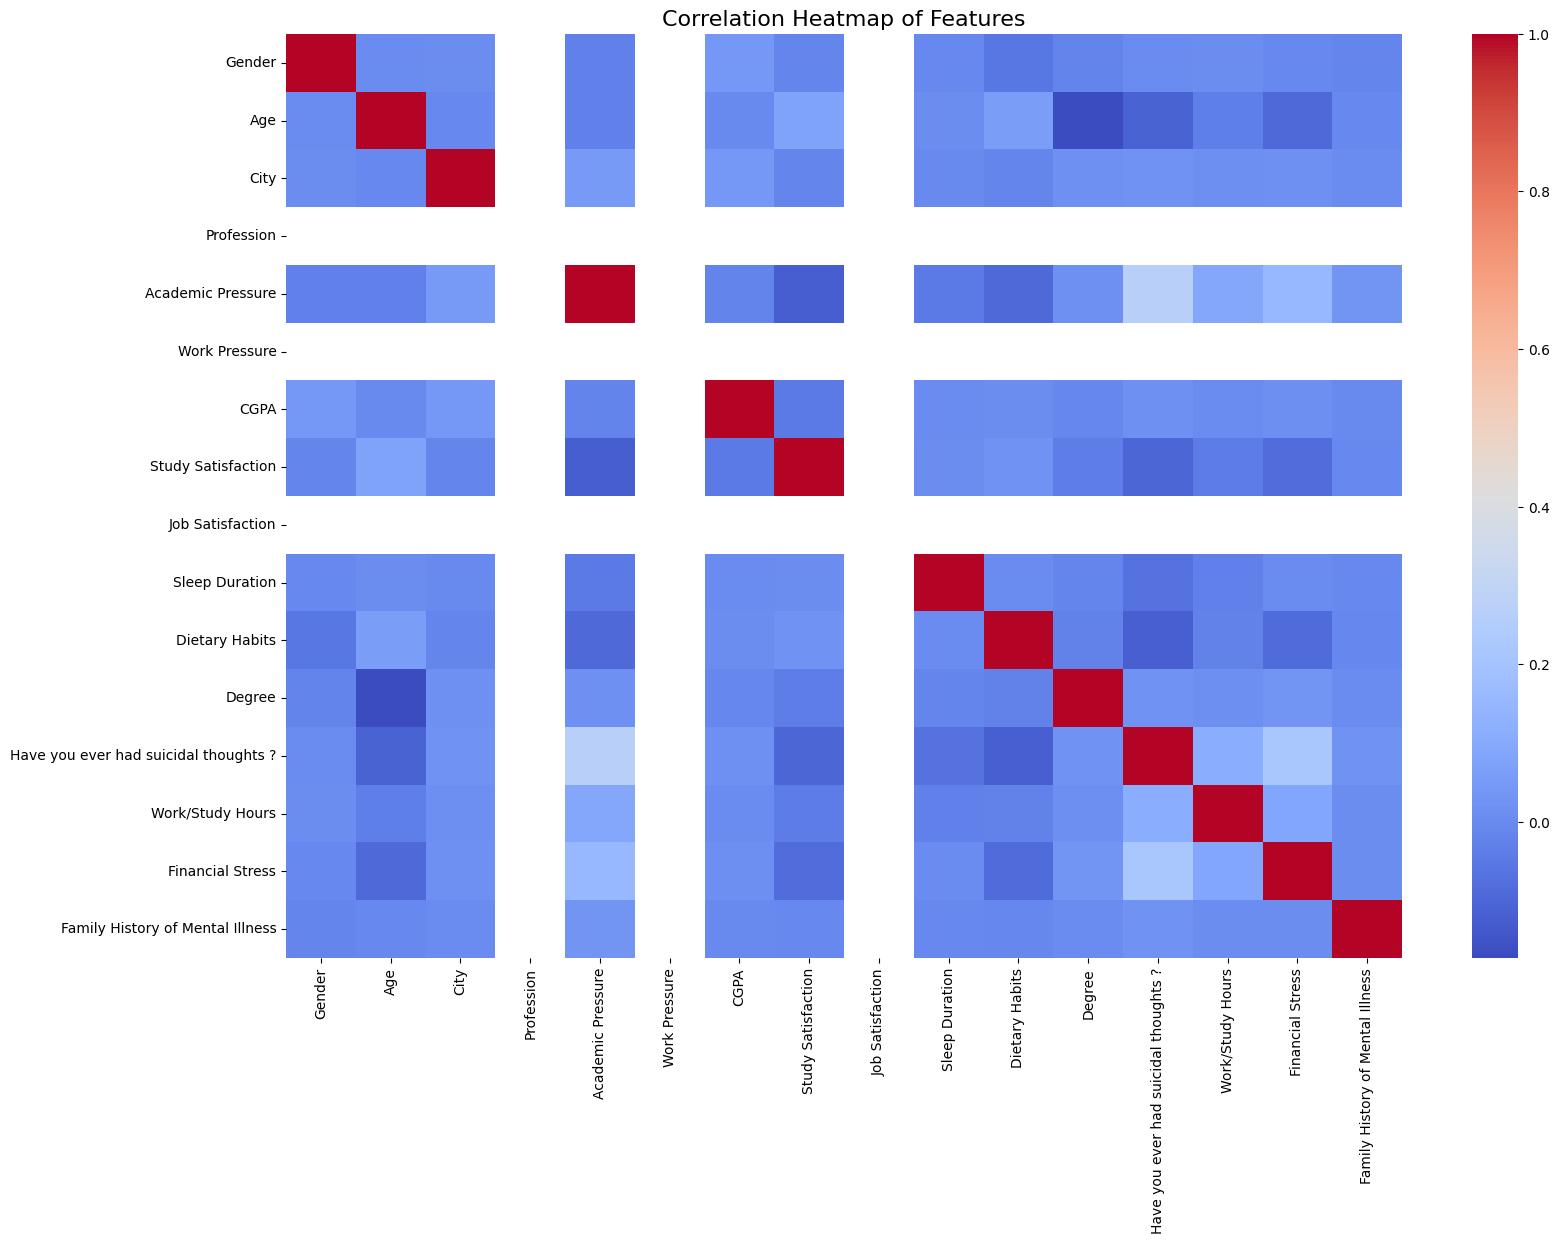


No features with correlation > 0.8 found to drop.
Shape of training data after correlation check: (17411, 16)


In [2]:
# ==============================================================================
# Step 2: Correlation Analysis
# ==============================================================================
plt.figure(figsize=(18, 12))
sns.heatmap(X_train.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

# --- Find and remove highly correlated features ---
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.8 (a common threshold)
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

if not to_drop:
    print("\nNo features with correlation > 0.8 found to drop.")
else:
    print(f"\nDropping features with correlation > 0.8: {to_drop}")
    X_train = X_train.drop(to_drop, axis=1)
    X_test = X_test.drop(to_drop, axis=1)

print("Shape of training data after correlation check:", X_train.shape)

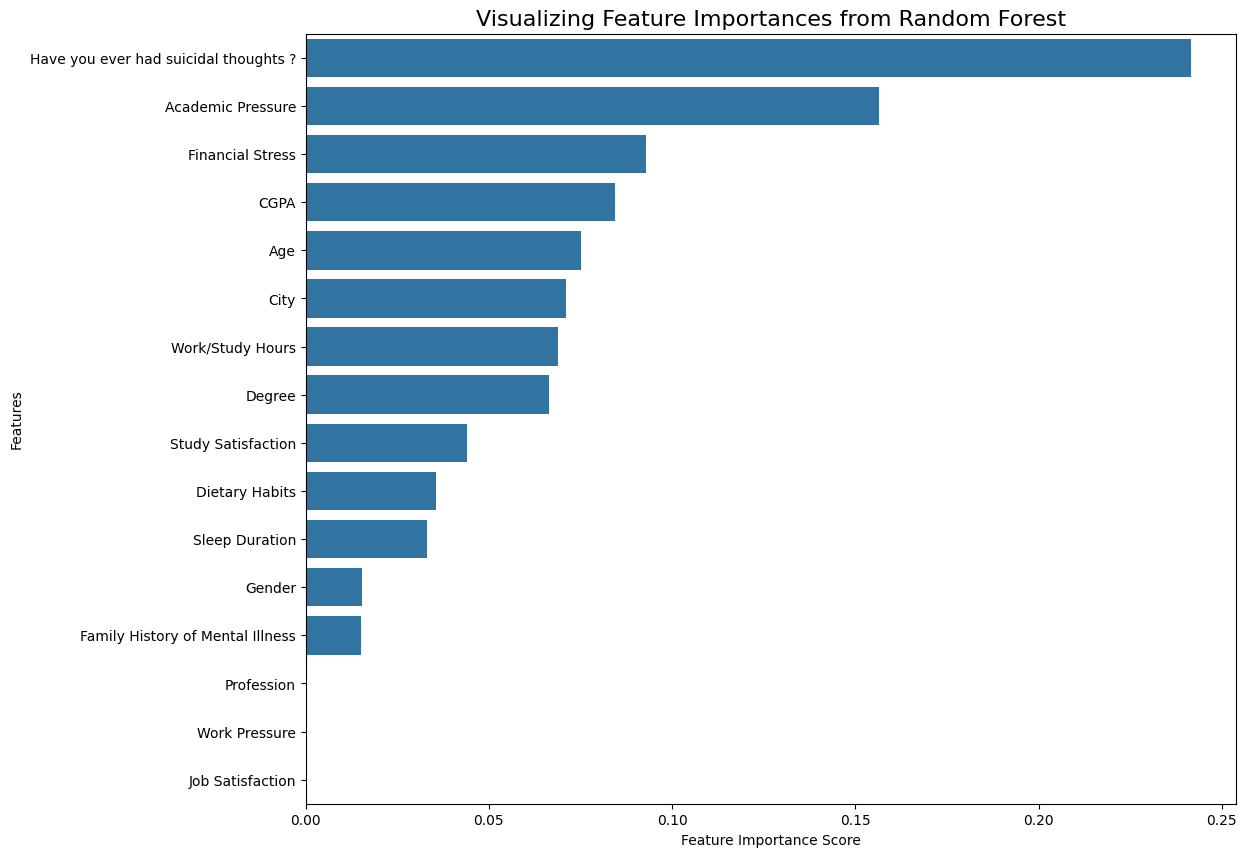

Feature Importances:
Have you ever had suicidal thoughts ?    0.241690
Academic Pressure                        0.156320
Financial Stress                         0.092995
CGPA                                     0.084408
Age                                      0.075267
City                                     0.071061
Work/Study Hours                         0.068832
Degree                                   0.066295
Study Satisfaction                       0.044059
Dietary Habits                           0.035489
Sleep Duration                           0.033067
Gender                                   0.015342
Family History of Mental Illness         0.015175
Profession                               0.000000
Work Pressure                            0.000000
Job Satisfaction                         0.000000
dtype: float64


In [3]:
# ==============================================================================
# Step 3: Random Forest Feature Importance
# ==============================================================================
# Train a RandomForestClassifier to get feature importance scores
# random_state ensures reproducibility
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)

# Create a pandas Series for easy plotting
importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)

# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)

# --- EDA: Visualize Feature Importances ---
plt.figure(figsize=(12, 10))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Feature Importances from Random Forest", fontsize=16)
plt.show()

print("Feature Importances:")
print(sorted_importances)

In [4]:
# ==============================================================================
# Step 4: Selecting the Final Set of Features
# ==============================================================================
# We will select the top 12 most important features as an example
# This number can be tuned later as a hyperparameter

N_FEATURES = 12
final_features = sorted_importances.nlargest(N_FEATURES).index.tolist()

print(f"\nSelected Top {N_FEATURES} Features: \n{final_features}")

# Create the final datasets with only the selected features
X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

print(f"\nFinal shape of training data: {X_train_final.shape}")


Selected Top 12 Features: 
['Have you ever had suicidal thoughts ?', 'Academic Pressure', 'Financial Stress', 'CGPA', 'Age', 'City', 'Work/Study Hours', 'Degree', 'Study Satisfaction', 'Dietary Habits', 'Sleep Duration', 'Gender']

Final shape of training data: (17411, 12)


In [5]:
# ==============================================================================
# Step 5: Save the Final Data for the Next Handoff (Model Training)
# ==============================================================================

# Save the final, feature-selected datasets
X_train_final.to_csv('X_train_final.csv', index=False)
X_test_final.to_csv('X_test_final.csv', index=False)

# Pass along the corresponding labels (these haven't changed)
y_train.to_csv('y_train_final.csv', index=False)
y_test.to_csv('y_test_final.csv', index=False)

print("\n✅ Handoff successful! Final feature-selected datasets have been saved.")


✅ Handoff successful! Final feature-selected datasets have been saved.
